In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
plt.rcParams.update({'font.size': 14})
from scipy.stats import linregress
from scipy.stats import pearsonr, spearmanr
from scipy.stats import ranksums
from scipy.stats import ttest_ind
from scipy.spatial import distance
from glob import glob
from sklearn.metrics import mean_squared_error

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option("max_rows", None)

In [3]:
#load info
Patient_Info = pd.read_csv('/Users/dawonchoi/Documents/HKUST/Y3/Summer/UROP 2200/Initial Recurrence/initial_info.csv', index_col=0)

In [4]:
#load initial file
Initial_relative = pd.read_table('/Users/dawonchoi/Documents/HKUST/Y3/Summer/UROP 2200/Initial Recurrence/initial_relative.txt', index_col=0)
Initial_relative.index = Initial_relative.index.map(lambda x: str(x)[:-2])

In [5]:
#load recurrence file
Recurrence_relative = pd.read_table('/Users/dawonchoi/Documents/HKUST/Y3/Summer/UROP 2200/Initial Recurrence/recurrence_relative.txt', index_col=0)
Recurrence_relative.index = Recurrence_relative.index.map(lambda x: str(x)[:-2])

In [6]:
initial_gene = pd.read_csv('/Users/dawonchoi/Documents/HKUST/Y3/Summer/UROP 2200/Initial Recurrence/pairedGlioma.initial.expression.protein_cod.log2RPKM.txt', sep='\t', index_col=0)
initial_gene = initial_gene.T
initial_gene.index = initial_gene.index.map(lambda x: str(x)[:-2])
initial_gene_marker = initial_gene.loc[:,["TMEM119", "SALL1", "NAV3", "P2RY12"]]
initial_gene_marker

,TMEM119,SALL1,NAV3,P2RY12
PS001,4.497868,5.572022,2.976651,6.167882
PS002,0.822076,4.759865,1.352908,2.224992
PS003,1.080119,4.753490,1.157426,2.686523
PS004,5.291875,4.517430,1.753415,3.625322
PS005,3.233365,5.454537,1.945411,4.041885
PS006,3.519593,3.890379,2.539380,4.105145
PS007,3.864505,4.760569,4.215135,5.364555
PS008,2.748271,5.483959,4.085170,4.708343
PS009,1.832749,5.543265,0.968370,2.834117
PS010,2.103379,3.447470,0.943801,2.967841


In [7]:
recurrence_gene = pd.read_csv('/Users/dawonchoi/Documents/HKUST/Y3/Summer/UROP 2200/Initial Recurrence/pairedGlioma.recurrence.expression.protein_cod.log2RPKM.txt', sep='\t', index_col=0)
recurrence_gene = recurrence_gene.T
recurrence_gene.index = recurrence_gene.index.map(lambda x: str(x)[:-2])
recurrence_gene_marker = recurrence_gene.loc[:,["TMEM119", "SALL1", "NAV3", "P2RY12"]]
recurrence_gene_marker

,TMEM119,SALL1,NAV3,P2RY12
PS001,2.969302,5.120512,3.268968,4.479652
PS002,3.430206,4.907675,3.343248,5.308827
PS003,4.243972,5.345704,4.358316,6.298879
PS004,2.770420,4.168975,2.514006,4.340418
PS005,1.702914,5.709050,0.533703,1.940319
PS006,3.375303,4.714446,1.166916,3.409322
PS007,2.414710,4.671038,1.232674,2.760375
PS008,0.744223,5.770766,1.913690,1.599732
PS009,4.338915,5.653633,1.460178,5.104971
PS010,2.752014,4.437488,1.166916,2.783487


In [8]:
common = initial_gene_marker.index.intersection(Patient_Info.index)
common2 = recurrence_gene_marker.index.intersection(Patient_Info.index)
final_common = recurrence_gene_marker.index.intersection(initial_gene_marker.index)
final_common

Index(['PS001', 'PS002', 'PS003', 'PS004', 'PS005', 'PS006', 'PS007', 'PS008',
       'PS009', 'PS010',
       ...
       'PSX20', 'PSX18', 'PSX01', 'PSX14', 'PSX07', 'PSX09', 'PSX08', 'PSX02',
       'PSX05', 'PSX13'],
      dtype='object', length=181)

In [9]:
combined_data = Patient_Info
combined_data = combined_data[combined_data.index.isin(final_common)]
idh = combined_data.loc[:, combined_data.columns == "IDH"]
mutant = combined_data.loc[:, combined_data.columns == "1p19qcodel"]
class_data = idh.join(mutant)
class_data

,IDH,1p19qcodel
Patient_ID,,
PS001,IDHwt,noncodel
PS002,IDHwt,noncodel
PS003,IDHwt,noncodel
PS004,IDHwt,noncodel
PS005,IDHwt,noncodel
PS006,IDHwt,noncodel
PS007,IDHwt,noncodel
PS008,IDHwt,noncodel
PS009,IDHmut,noncodel


In [10]:
#selecting for IDHwt
select = class_data[(class_data['IDH']=="IDHwt")]
class_data.loc[select.index, 'Molecular Class'] = "IDH - wildtype"
class_data

,IDH,1p19qcodel,Molecular Class
Patient_ID,,,
PS001,IDHwt,noncodel,IDH - wildtype
PS002,IDHwt,noncodel,IDH - wildtype
PS003,IDHwt,noncodel,IDH - wildtype
PS004,IDHwt,noncodel,IDH - wildtype
PS005,IDHwt,noncodel,IDH - wildtype
PS006,IDHwt,noncodel,IDH - wildtype
PS007,IDHwt,noncodel,IDH - wildtype
PS008,IDHwt,noncodel,IDH - wildtype
PS009,IDHmut,noncodel,NaN


In [11]:
#selecting for IDH – mutant + noncodel
select2 = class_data[(class_data['IDH']=="IDHmut")&(class_data['1p19qcodel']=="noncodel")]
class_data.loc[select2.index, 'Molecular Class'] = "IDH – mutant (noncodel)"
class_data

,IDH,1p19qcodel,Molecular Class
Patient_ID,,,
PS001,IDHwt,noncodel,IDH - wildtype
PS002,IDHwt,noncodel,IDH - wildtype
PS003,IDHwt,noncodel,IDH - wildtype
PS004,IDHwt,noncodel,IDH - wildtype
PS005,IDHwt,noncodel,IDH - wildtype
PS006,IDHwt,noncodel,IDH - wildtype
PS007,IDHwt,noncodel,IDH - wildtype
PS008,IDHwt,noncodel,IDH - wildtype
PS009,IDHmut,noncodel,IDH – mutant (noncodel)


In [12]:
class_data = class_data.fillna("IDH-mutant (codel)")
class_data

,IDH,1p19qcodel,Molecular Class
Patient_ID,,,
PS001,IDHwt,noncodel,IDH - wildtype
PS002,IDHwt,noncodel,IDH - wildtype
PS003,IDHwt,noncodel,IDH - wildtype
PS004,IDHwt,noncodel,IDH - wildtype
PS005,IDHwt,noncodel,IDH - wildtype
PS006,IDHwt,noncodel,IDH - wildtype
PS007,IDHwt,noncodel,IDH - wildtype
PS008,IDHwt,noncodel,IDH - wildtype
PS009,IDHmut,noncodel,IDH – mutant (noncodel)


In [13]:
#TMEM119
initial_gene_marker = initial_gene_marker[initial_gene_marker.index.isin(final_common)]
recurrence_gene_marker = recurrence_gene_marker[recurrence_gene_marker.index.isin(final_common)]
initial = initial_gene_marker.loc[:, initial_gene_marker.columns == "TMEM119"]
initial.columns = ['Initial']
recurrence = recurrence_gene_marker.loc[:, recurrence_gene_marker.columns == "TMEM119"]
recurrence.columns = ['Recurrent']
TMEM119_data = initial.join(recurrence)
TMEM119_final = pd.concat([class_data, TMEM119_data], axis=1)
TMEM119_final.index.name = 'Mixture'
TMEM119_final = TMEM119_final.drop(['IDH','1p19qcodel'], axis=1)
TMEM119_final = TMEM119_final.sort_values(by='Mixture')
TMEM119_mdf = pd.melt(TMEM119_final.reset_index(), id_vars=('Mixture','Molecular Class'))
TMEM119_mdf

,Mixture,Molecular Class,variable,value
0,PS001,IDH - wildtype,Initial,4.497868
1,PS002,IDH - wildtype,Initial,0.822076
2,PS003,IDH - wildtype,Initial,1.080119
3,PS004,IDH - wildtype,Initial,5.291875
4,PS005,IDH - wildtype,Initial,3.233365
5,PS006,IDH - wildtype,Initial,3.519593
6,PS007,IDH - wildtype,Initial,3.864505
7,PS008,IDH - wildtype,Initial,2.748271
8,PS009,IDH – mutant (noncodel),Initial,1.832749
9,PS010,IDH - wildtype,Initial,2.103379


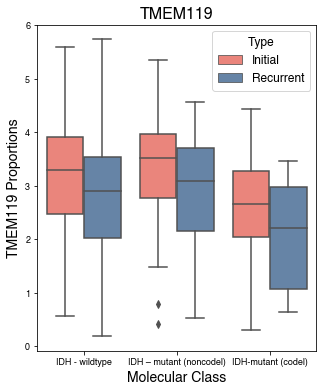

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
colors = ["#FC766AFF","#5B84B1FF"]
sns.set_palette(sns.color_palette(colors))

plt.figure(figsize=(5,6))
plt.title("TMEM119", fontsize=16)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
ax = sns.boxplot(x='Molecular Class', y='value',hue="variable", data=TMEM119_mdf)
ax.set_xlabel("Molecular Class", fontsize=14)
ax.set_ylabel("TMEM119 Proportions", fontsize=14)  
ax.legend(loc='upper right', fontsize=12,title='Type',title_fontsize=12,borderpad=.5, labelspacing=.5)

In [15]:
m_class = ['IDH - wildtype','IDH – mutant (noncodel)','IDH-mutant (codel)']

for p in m_class:
    specific_progression = TMEM119_mdf.loc[TMEM119_mdf['Molecular Class'] == p]
    first = specific_progression.loc[specific_progression['variable'] == 'Initial']
    second = specific_progression.loc[specific_progression['variable'] == 'Recurrent']
    print(p)
    print('Between Initial and Recurrence: ')
    print(ranksums(first.iloc[:,3], second.iloc[:,3]))
    print ('--------------------------------')

IDH - wildtype
Between Initial and Recurrence: 
RanksumsResult(statistic=2.3834744583442187, pvalue=0.017150074540908715)
--------------------------------
IDH – mutant (noncodel)
Between Initial and Recurrence: 
RanksumsResult(statistic=2.02837021134844, pvalue=0.04252247799805163)
--------------------------------
IDH-mutant (codel)
Between Initial and Recurrence: 
RanksumsResult(statistic=1.645207192637665, pvalue=0.09992709075734191)
--------------------------------


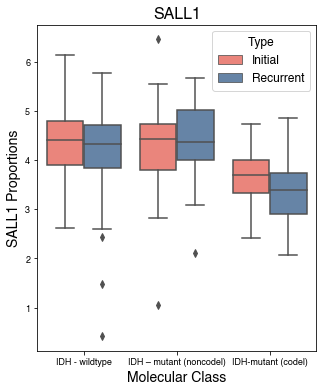

In [16]:
#SALL1
initial_gene_marker = initial_gene_marker[initial_gene_marker.index.isin(final_common)]
recurrence_gene_marker = recurrence_gene_marker[recurrence_gene_marker.index.isin(final_common)]
initial = initial_gene_marker.loc[:, initial_gene_marker.columns == "SALL1"]
initial.columns = ['Initial']
recurrence = recurrence_gene_marker.loc[:, recurrence_gene_marker.columns == "SALL1"]
recurrence.columns = ['Recurrent']
SALL1_data = initial.join(recurrence)
SALL1_final = pd.concat([class_data, SALL1_data], axis=1)
SALL1_final.index.name = 'Mixture'
SALL1_final = SALL1_final.drop(['IDH','1p19qcodel'], axis=1)
SALL1_final = SALL1_final.sort_values(by='Mixture')
SALL1_mdf = pd.melt(SALL1_final.reset_index(), id_vars=('Mixture','Molecular Class'))
plt.figure(figsize=(5,6))
plt.title("SALL1", fontsize=16)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
ax = sns.boxplot(x='Molecular Class', y='value',hue="variable", data=SALL1_mdf)
ax.set_xlabel("Molecular Class", fontsize=14)
ax.set_ylabel("SALL1 Proportions", fontsize=14)  
ax.legend(loc='upper right', fontsize=12,title='Type',title_fontsize=12,borderpad=.5, labelspacing=.5)

In [17]:
m_class = ['IDH - wildtype','IDH – mutant (noncodel)','IDH-mutant (codel)']

for p in m_class:
    specific_progression = SALL1_mdf.loc[SALL1_mdf['Molecular Class'] == p]
    first = specific_progression.loc[specific_progression['variable'] == 'Initial']
    second = specific_progression.loc[specific_progression['variable'] == 'Recurrent']
    print(p)
    print('Between Initial and Recurrence: ')
    print(ranksums(first.iloc[:,3], second.iloc[:,3]))
    print ('--------------------------------')

IDH - wildtype
Between Initial and Recurrence: 
RanksumsResult(statistic=1.119114925421595, pvalue=0.26309111320678935)
--------------------------------
IDH – mutant (noncodel)
Between Initial and Recurrence: 
RanksumsResult(statistic=-0.6566198440583091, pvalue=0.5114253859607516)
--------------------------------
IDH-mutant (codel)
Between Initial and Recurrence: 
RanksumsResult(statistic=1.4237369936287485, pvalue=0.1545226206284662)
--------------------------------


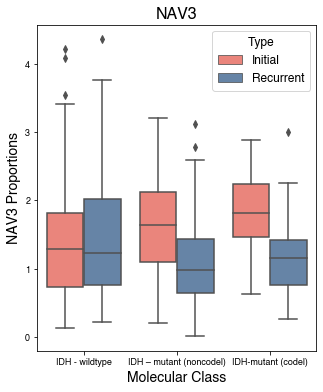

In [18]:
#NAV3
initial_gene_marker = initial_gene_marker[initial_gene_marker.index.isin(final_common)]
recurrence_gene_marker = recurrence_gene_marker[recurrence_gene_marker.index.isin(final_common)]
initial = initial_gene_marker.loc[:, initial_gene_marker.columns == "NAV3"]
initial.columns = ['Initial']
recurrence = recurrence_gene_marker.loc[:, recurrence_gene_marker.columns == "NAV3"]
recurrence.columns = ['Recurrent']
NAV3_data = initial.join(recurrence)
NAV3_final = pd.concat([class_data, NAV3_data], axis=1)
NAV3_final.index.name = 'Mixture'
NAV3_final = NAV3_final.drop(['IDH','1p19qcodel'], axis=1)
NAV3_final = NAV3_final.sort_values(by='Mixture')
NAV3_mdf = pd.melt(NAV3_final.reset_index(), id_vars=('Mixture','Molecular Class'))
plt.figure(figsize=(5,6))
plt.title("NAV3", fontsize=16)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
ax = sns.boxplot(x='Molecular Class', y='value',hue="variable", data=NAV3_mdf)
ax.set_xlabel("Molecular Class", fontsize=14)
ax.set_ylabel("NAV3 Proportions", fontsize=14)  
ax.legend(loc='upper right', fontsize=12,title='Type',title_fontsize=12,borderpad=.5, labelspacing=.5)

In [19]:
m_class = ['IDH - wildtype','IDH – mutant (noncodel)','IDH-mutant (codel)']

for p in m_class:
    specific_progression = NAV3_mdf.loc[NAV3_mdf['Molecular Class'] == p]
    first = specific_progression.loc[specific_progression['variable'] == 'Initial']
    second = specific_progression.loc[specific_progression['variable'] == 'Recurrent']
    print(p)
    print('Between Initial and Recurrence: ')
    print(ranksums(first.iloc[:,3], second.iloc[:,3]))
    print ('--------------------------------')

IDH - wildtype
Between Initial and Recurrence: 
RanksumsResult(statistic=-0.48484530849264246, pvalue=0.6277860803104303)
--------------------------------
IDH – mutant (noncodel)
Between Initial and Recurrence: 
RanksumsResult(statistic=3.218087354543198, pvalue=0.0012904850894719575)
--------------------------------
IDH-mutant (codel)
Between Initial and Recurrence: 
RanksumsResult(statistic=2.8632932871867056, pvalue=0.004192622832979163)
--------------------------------


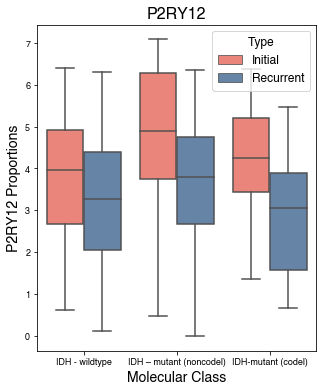

In [20]:
#P2RY12
initial_gene_marker = initial_gene_marker[initial_gene_marker.index.isin(final_common)]
recurrence_gene_marker = recurrence_gene_marker[recurrence_gene_marker.index.isin(final_common)]
initial = initial_gene_marker.loc[:, initial_gene_marker.columns == "P2RY12"]
initial.columns = ['Initial']
recurrence = recurrence_gene_marker.loc[:, recurrence_gene_marker.columns == "P2RY12"]
recurrence.columns = ['Recurrent']
P2RY12_data = initial.join(recurrence)
P2RY12_final = pd.concat([class_data, P2RY12_data], axis=1)
P2RY12_final.index.name = 'Mixture'
P2RY12_final = P2RY12_final.drop(['IDH','1p19qcodel'], axis=1)
P2RY12_final = P2RY12_final.sort_values(by='Mixture')
P2RY12_mdf = pd.melt(P2RY12_final.reset_index(), id_vars=('Mixture','Molecular Class'))
plt.figure(figsize=(5,6))
plt.title("P2RY12", fontsize=16)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
ax = sns.boxplot(x='Molecular Class', y='value',hue="variable", data=P2RY12_mdf)
ax.set_xlabel("Molecular Class", fontsize=14)
ax.set_ylabel("P2RY12 Proportions", fontsize=14)  
ax.legend(loc='upper right', fontsize=12,title='Type',title_fontsize=12,borderpad=.5, labelspacing=.5)

In [21]:
m_class = ['IDH - wildtype','IDH – mutant (noncodel)','IDH-mutant (codel)']

for p in m_class:
    specific_progression = P2RY12_mdf.loc[P2RY12_mdf['Molecular Class'] == p]
    first = specific_progression.loc[specific_progression['variable'] == 'Initial']
    second = specific_progression.loc[specific_progression['variable'] == 'Recurrent']
    print(p)
    print('Between Initial and Recurrence: ')
    print(ranksums(first.iloc[:,3], second.iloc[:,3]))
    print ('--------------------------------')

IDH - wildtype
Between Initial and Recurrence: 
RanksumsResult(statistic=2.8839936453441664, pvalue=0.003926666769371921)
--------------------------------
IDH – mutant (noncodel)
Between Initial and Recurrence: 
RanksumsResult(statistic=3.770688213404151, pvalue=0.0001627979665051512)
--------------------------------
IDH-mutant (codel)
Between Initial and Recurrence: 
RanksumsResult(statistic=2.720919587823831, pvalue=0.006510059534835179)
--------------------------------
